https://drive.google.com/file/d/1d-k8yFDCjCywSSpJ35Gjj2rRF2AqBDxQ/view?usp=sharing

In [ ]:
! gdown 1d-k8yFDCjCywSSpJ35Gjj2rRF2AqBDxQ

Downloading...
From: https://drive.google.com/uc?id=1d-k8yFDCjCywSSpJ35Gjj2rRF2AqBDxQ
To: /content/adult.csv
100% 5.33M/5.33M [00:00<00:00, 155MB/s]


In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

In [ ]:
df = pd.read_csv('/content/adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
for col in df.columns:
  df.loc[df[col] == "?", col] = np.NaN
# df.loc[df['income'] == '<=50K', 'income'] = 0
# df.loc[df['income'] == '>50K', 'income'] = 1

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  float64
 1   workclass        46043 non-null  object 
 2   fnlwgt           48842 non-null  float64
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       46033 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  float64
 13  native-country   47985 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
df[df['occupation'].isna()].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
6,29.0,NaN,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
13,58.0,NaN,299831.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K
22,72.0,NaN,132015.0,7th-8th,4.0,Divorced,NaN,Not-in-family,White,Female,0.0,0.0,6.0,United-States,<=50K
35,65.0,NaN,191846.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [ ]:
df = df[~(df['workclass'].isna())]
df = df[~(df['occupation'].isna())]
df = df[~(df['native-country'].isna())]

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8.27)})

[Text(0.5, 1.0, 'Связь пола и расы со средним (медианным) уровенем образования')]

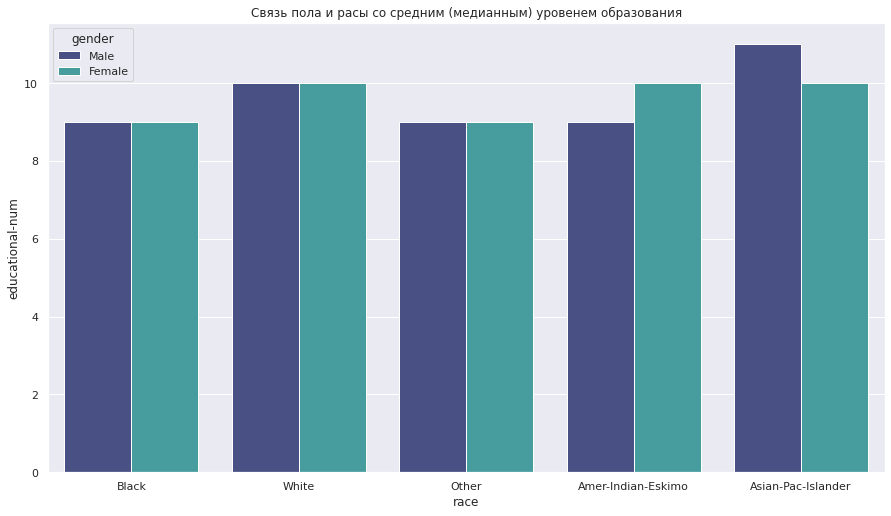

In [ ]:
sns.barplot(data=df, x="race", y="educational-num", hue='gender', palette='mako', estimator=np.median, ci=None).set(title='Связь пола и расы со средним (медианным) уровенем образования')

In [ ]:
selectedColumns = df[['age', 'educational-num', 'native-country', 'income']]
X = pd.get_dummies(selectedColumns, columns=['native-country'])
del X['income']

In [ ]:
selectedColumns.head()

,age,educational-num,native-country,income
0,25.0,7.0,United-States,<=50K
1,38.0,9.0,United-States,<=50K
2,28.0,12.0,United-States,>50K
3,44.0,10.0,United-States,>50K
5,34.0,6.0,United-States,<=50K


In [ ]:
X.head()

,age,educational-num,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28.0,12.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34.0,6.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
le.transform(['<=50K', '>50K'])

array([0, 1])

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [ ]:
y = pd.Series(data=le.transform(df['income']))

In [ ]:
y

0        0
1        0
2        1
3        1
4        0
        ..
45217    0
45218    1
45219    0
45220    0
45221    1
Length: 45222, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
proba = model.predict_proba(X_test)

In [ ]:
predictions[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
proba[0:5]

array([[0.97643732, 0.02356268],
       [0.81175392, 0.18824608],
       [0.65777589, 0.34222411],
       [0.89169269, 0.10830731],
       [0.74950561, 0.25049439]])

In [ ]:
model.score(X_train, y_train)

0.7780357685822484

In [ ]:
model.score(X_test, y_test)

0.7812050856826976

CVC

In [ ]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
clf.score(X_train, y_train) 

0.7806341045415596

In [ ]:
clf.score(X_test, y_test)

0.7846323935876175

В ходе работы была обучена модель логистической регрессии и опорных векторов.

Модель предсказывает уровень дохода человека (больше либо меньше чем 50K) в зависимости от его возраста, уровня образования и страны.

Модель дает правильное предсказание в приблизительно 80% случаев.

Категориальные переменные были преобразованы с помощью бинарного кодирования.

Для улучшения модели и увеличения точности предсказаний рекомендуется увеличить число признаков.




